## Часть 4.
---
В данной части я провожу небольшой анализ полученных данных, а также строю карту для понимания местоположения каждой квартиры.

In [139]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from rich.console import Console

In [140]:
data = pd.read_csv("data_cleaned.csv")

In [141]:
data.head()

,name,latitude,longitude,price_sqm,change_last_q,change_last_y,rental_yield,change_last_y_rental_price,price_hist,district_cor,...,trans_dist_2,trans_type_3,trans_name_3,trans_dist_3,trans_type_4,trans_name_4,trans_dist_4,trans_type_5,trans_name_5,trans_dist_5
0,101 Mansion,13.787435,100.631564,243655,0,-13.72,0.00,–,"[{""date"":""2008-10-01"",""value"":15735},{""date"":""...",Khet Bang Kapi,...,4800,expressway,Pracha Uthit Toll Plaza,5000,mrt,Sutthisan,8100,mrt,Huai Khwang,8300
1,624 Condolette Ladprao,13.766348,100.649395,45845,-3.45,-8.65,6.78,24.52,"[{""date"":""2010-07-01"",""value"":36242},{""date"":""...",Khet Bang Kapi,...,6200,expressway,Pracha Uthit Toll Plaza,6500,mrt,Huai Khwang,9800,mrt,Thailand Cultural Centre,9900
2,Adamas Ramkhamhaeng,13.752448,100.615507,31129,0,0,0.00,–,"[{""date"":""2014-10-01"",""value"":25258},{""date"":""...",Khet Bang Kapi,...,2500,expressway,Phatthanakan 2 Toll Plaza,2900,bts,Phra Khanong,6100,bts,Ekkamai,6300
3,Aspire Ladprao 113,13.770286,100.638799,77711,-4.28,-4.87,5.82,-5.51,"[{""date"":""2016-10-01"",""value"":79976},{""date"":""...",Khet Bang Kapi,...,5400,expressway,Srinagarindra Toll Plaza,6100,mrt,Sutthisan,8500,mrt,Huai Khwang,8700
4,Assagarn Place Ramkhamhaeng,13.765193,100.653498,36571,0,8.73,5.74,-0.57,"[{""date"":""2010-01-01"",""value"":21443},{""date"":""...",Khet Bang Kapi,...,4000,expressway,Yothin Phatthana Toll Plaza,10000,mrt,Huai Khwang,14000,mrt,Sutthisan,14000


In [142]:
Bangkok = ((13.45 - 0.5, 13.45 + 0.5), (100.50 - 0.2, 100.50 + 0.2)) 

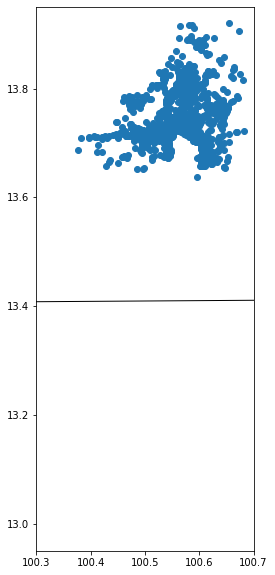

In [143]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(Bangkok[1])
ax.set_ylim(Bangkok[0])
base = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base.plot(ax=ax, color="white", edgecolor="black")
condas = data[["latitude", "longitude"]]
plt.scatter(data=condas, x="longitude", y="latitude")

Что ж, не так уж информативно. Попробуем сделать то же самое, но использовав библиотеку folium

In [144]:
map = folium.Map(location=[13.75, 100.50], zoom_start=8)
for i in range(0,len(data)):
    folium.Marker(
        location=[data.iloc[[i]]["latitude"], data.iloc[[i]]['longitude']],popup=data.iloc[[i]]["name"].to_string(), icon=folium.Icon("green")
    ).add_to(map)
map

Довольно много. Отобразим каждую сотую запись

In [145]:
map = folium.Map(location=[13.75, 100.50], zoom_start=8)
for i in range(0,len(data), 100):
    folium.Marker(
        location=[data.iloc[[i]]["latitude"], data.iloc[[i]]['longitude']],popup=data.iloc[[i]]["name"].to_string(), icon=folium.Icon("green")
    ).add_to(map)
map

Исходя из этих географических данных можно сделать вывод, что большенство предлагаемых апартаментов расположены в центре города

---

Посчитаем, во сколько нам обойдется проживание в городе Бангкоке

Средняя стоимость за метр квадратный
104765.75032258064

<AxesSubplot:ylabel='price_sqm'>

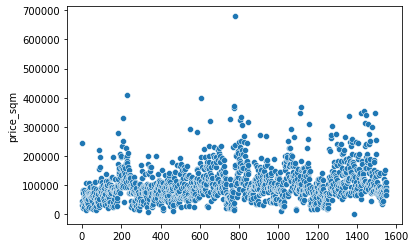

In [146]:
console = Console()
mean = data["price_sqm"].mean()
console.print(f"Средняя стоимость за метр квадратный\n{mean}")
sns.scatterplot(data=data, x=data.axes[0],y="price_sqm")

Из данного графика видно, что в метр квадратный в Бангкоке обходится в ценовом диапазоне от 50.000 до 120.000